In [ ]:
"""let's now take our original dataset and focus only on statiscian"""

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

stat = rf[rf["job_title"]== "Statistician"]

stat_exploded = stat.explode("skills_list")

grouping1 = stat_exploded.groupby(["skills_list"]).agg(
    new_column = ("skills_list", "count"),
    stat_salary = ("mean_salary", "median")
)

grouping1_sorted = grouping1.sort_values(by="new_column", ascending=False)

6 [-0.10490716  0.50254327]
8 [-0.72676349 -0.17696224]


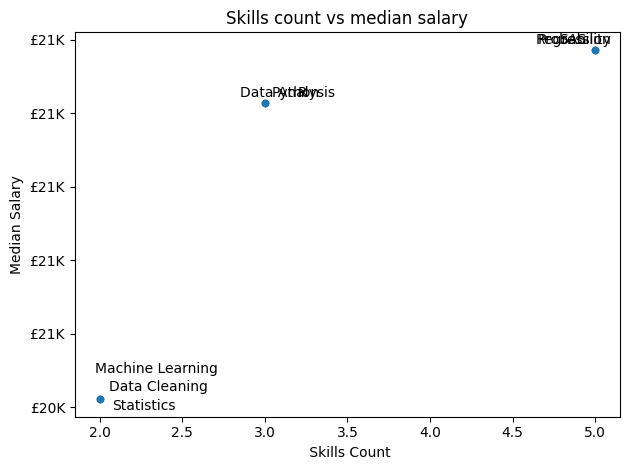

[Text(4.877633568548388, 21398.723214285717, 'Probability'), Text(4.87139616935484, 21398.723214285717, 'Regression'), Text(4.866406250000001, 21398.723214285717, 'SAS'), Text(3.136391129032259, 21326.723214285714, 'Data Analysis'), Text(3.186706149193549, 21326.723214285714, 'Python'), Text(3.2249621975806457, 21326.723214285714, 'R'), Text(2.3573496582625832, 20927.71411588393, 'Data Cleaning'), Text(2.3415273313897527, 20952.707464450894, 'Machine Learning'), Text(2.2711189516129036, 20901.386904761905, 'Statistics')]


In [18]:
# plotting 
# let's import adjusttext library
from adjustText import adjust_text

grouping1_sorted.plot(kind="scatter", x="new_column", y="stat_salary" )

new_list2 = []
"""let's now add the name of skills because it doesn't add this automatically"""
for index, value23 in enumerate(grouping1_sorted.index):
    new_list2.append(plt.text(grouping1_sorted["new_column"].iloc[index], grouping1_sorted["stat_salary"].iloc[index], value23))
"arrowdrops was supposed to add arrow with their style, colour, width"


adjust_text(new_list2, arrowdrops = dict(arrowstyle="->", color="gray", lw=0.5))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f"£{int(y/1000)}K"))
plt.xlabel(" Skills Count")
plt.ylabel("Median Salary")
plt.title("Skills count vs median salary")
plt.tight_layout()
plt.show()
print(new_list2)